In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

![image.png](attachment:image.png)

# Gaussian Distribution

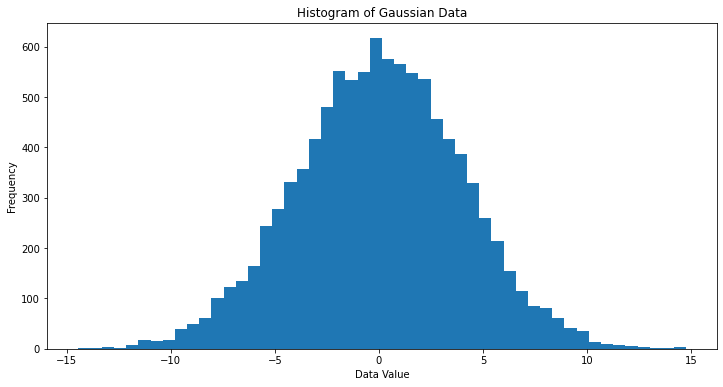

In [11]:
np.random.seed(10)
# We choose mean ans standard deviation for our normal distribution
mu = 0
sigma = 4
# Make a random sample of 10.000 data points for normal distribution
X = np.random.standard_normal(size=10000) * sigma + mu
# making our histogram
plt.hist(X, bins=50)
plt.title("Histogram of Gaussian Data")
plt.xlabel("Data Value")
plt.ylabel("Frequency")

plt.rcParams["figure.figsize"] = [8, 6]
plt.show()

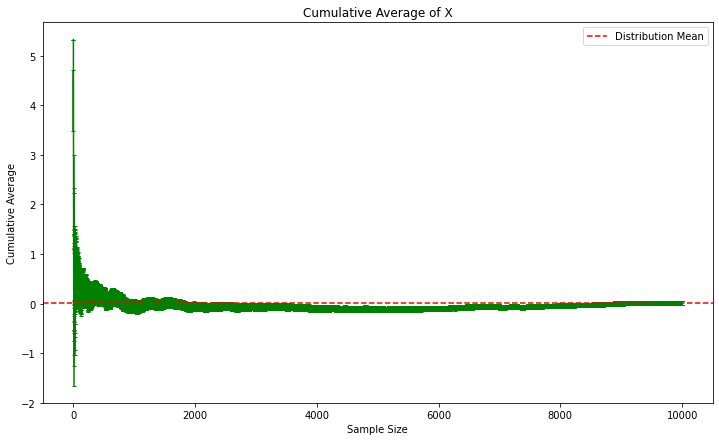

In [17]:
#Point 3 till 6
cumulative_avg = np.cumsum(X) / np.arange(1, len(X) + 1)
cumulative_error = np.cumsum((X - cumulative_avg) ** 2) / np.arange(1, len(X) + 1)
cumulative_standard_error = np.sqrt(cumulative_error) / np.sqrt(np.arange(1, len(X) + 1))

distribution_mean = np.mean(X) #  (1/N) sum(x_i) 
distribution_median = np.median(X) # (1/N) sum(x_i)

plt.errorbar(np.arange(1, len(X) + 1), cumulative_avg, yerr=cumulative_standard_error, fmt='-', capsize=2,color='green')
plt.axhline(y=distribution_mean, color='red', linestyle='--', label='Distribution Mean')

plt.xlabel('Sample Size')
plt.ylabel('Cumulative Average')
plt.title('Cumulative Average of X')
plt.legend()
plt.rcParams["figure.figsize"] = [12, 7]
plt.show()


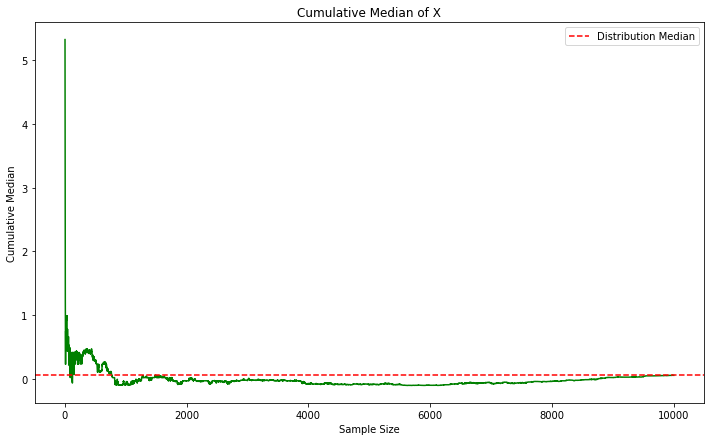

In [16]:
#Point 7 till 8
cumulative_median = np.zeros(len(X))
for i in range(len(X)):
    cumulative_median[i] = np.median(X[:i+1])

plt.plot(np.arange(1, len(X) + 1), cumulative_median, '-',color="green")
plt.axhline(y=distribution_median, color='r', linestyle='--', label='Distribution Median')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Median')
plt.title('Cumulative Median of X')
plt.legend()
plt.show()

# Pareto Distribution

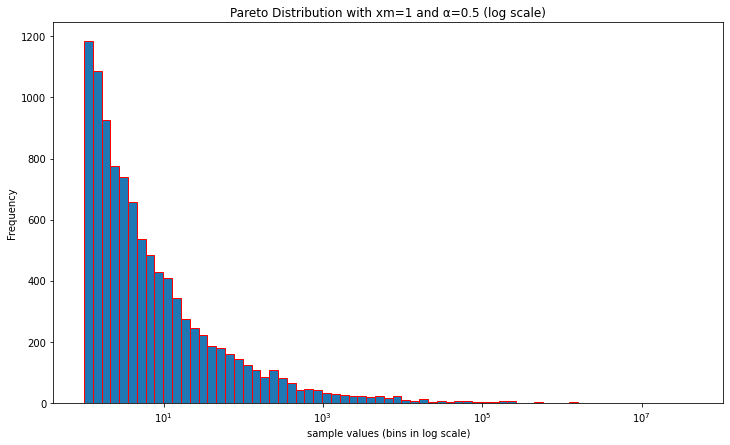

In [63]:
#Point 9 until 10
np.random.seed(9)
#Pareto distribution
xm = 1 #mode
alpha = 0.5 #shape
bin_num = 70

Pareto_data = (np.random.pareto(alpha, size=10000) + 1) * xm
#Pareto_data = np.random.pareto(alpha, size=10000) + xm - 1 both methods seem to work
#plt.hist(Pareto_data, bins=300, log=True) # , log=True)

plt.hist(Pareto_data, bins = np.logspace(np.log10(1),np.log10(np.max(Pareto_data)),bin_num),ec="red")
#plt.yscale('log')
plt.xscale('log')

plt.title("Pareto Distribution with xm=1 and α=0.5 (log scale)")
plt.xlabel("sample values (bins in log scale)")
plt.ylabel("Frequency")
#plt.ylabel("Frequency (log scale)")
plt.show()


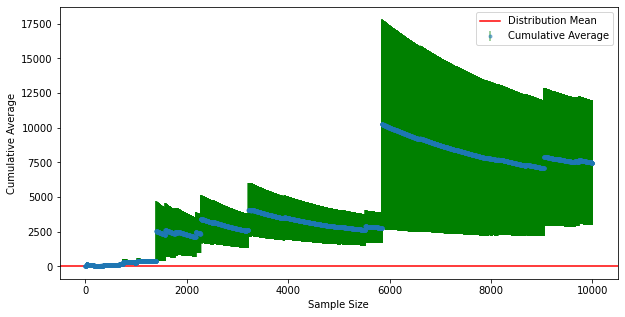

In [72]:
cumulative_avg_Par = np.cumsum(Pareto_data) / np.arange(1, len(Pareto_data) + 1)
cumulative_error_Par = np.cumsum((Pareto_data - cumulative_avg_Par) ** 2) / np.arange(1, len(Pareto_data) + 1)
cumulative_standard_error_Par = np.sqrt(cumulative_error_Par) / np.sqrt(np.arange(1, len(Pareto_data) + 1)) # (approximated) standard error.

distribution_mean_Par = alpha*xm/(alpha-1) #np.mean(Pareto_data) Theoretical or observed estimators?
distribution_median_Par = xm * (2**(1/alpha)) #np.median(Pareto_data)
sample_mean_par = np.mean(Pareto_data)

plt.figure(figsize=(10, 5))
plt.errorbar(np.arange(1, len(Pareto_data)+1), cumulative_avg_Par, yerr=cumulative_standard_error_Par, fmt='.', ecolor='green', alpha=0.5, label='Cumulative Average')
plt.axhline(distribution_mean_Par, color='r', label='Distribution Mean')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Average')
plt.legend()
plt.show()
#Graph makes sense, when taking the distribution into account. There are times when we sample a lucky observation (at around 1700, 2200, 3200 and 5800).

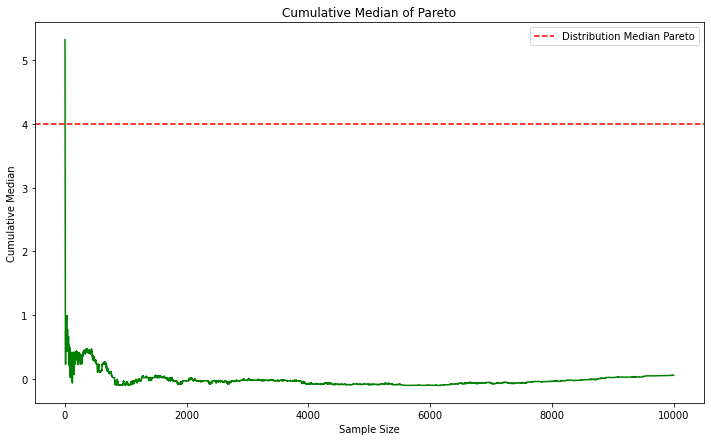

In [73]:
#Point 7 till 8
cumulative_median_pareto = np.zeros(len(Pareto_data))
for i in range(len(Pareto_data)):
    cumulative_median_pareto[i] = np.median(Pareto_data[:i+1])

plt.plot(np.arange(1, len(Pareto_data) + 1), cumulative_median, '-',color="green")
plt.axhline(y=distribution_median_Par, color='r', linestyle='--', label='Distribution Median Pareto')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Median')
plt.title('Cumulative Median of Pareto')
plt.legend()
plt.show() # The median is very low compared to mean, since ~99% we sample low numbers 
           #  and while the mean might be pushed up by a single lucky number, when we are calculating median, we only look at quantiles.

In [70]:
distribution_median_Par

4.0

# LogNormal Distribution

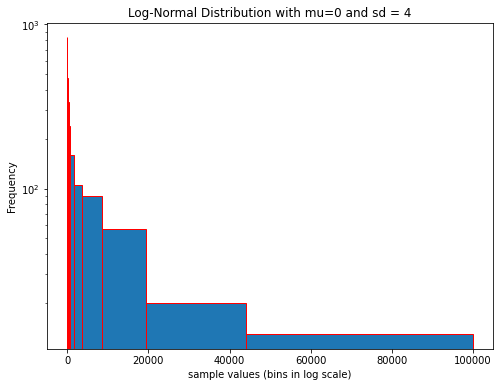

In [112]:
np.random.seed(10)
# We choose mean ans standard deviation for our normal distribution
mu = 0
sigma = 4
bin_num = 15
# Make a random sample of 10.000 data points for normal distribution
X_log = np.exp(np.random.standard_normal(size=10000) * sigma + mu) # np.random.lognormal(sigma=4,size=10000) #
# making our histogram
plt.hist(X_log, bins = np.logspace(np.log10(1),np.log10(np.max(100000)),bin_num),ec="red")
#plt.hist(X_log, bins = 100,log = True)
plt.yscale('log')
plt.title("Log-Normal Distribution with mu=0 and sd = 4")
plt.xlabel("sample values (bins in log scale)")
plt.ylabel("Frequency")
#plt.ylabel("Frequency (log scale)")
plt.show()


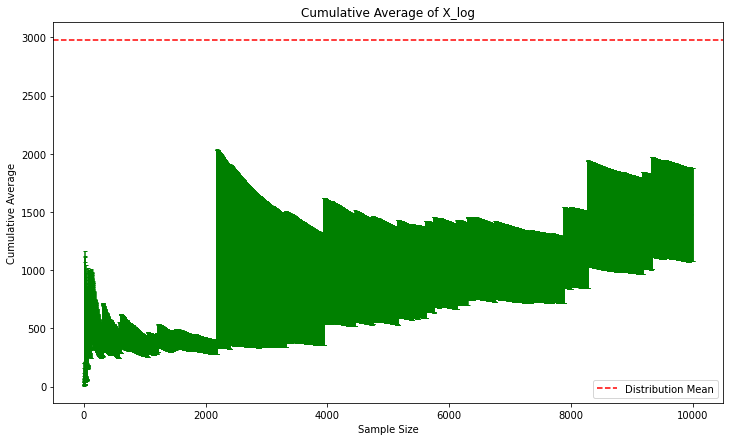

In [120]:
#Point 3 till 6
cumulative_avg_log = np.cumsum(X_log) / np.arange(1, len(X_log) + 1)
cumulative_error_log = np.cumsum((X_log - cumulative_avg_log) ** 2) / np.arange(1, len(X_log) + 1)
cumulative_standard_error_log = np.sqrt(cumulative_error_log) / np.sqrt(np.arange(1, len(X_log) + 1))

distribution_mean_log = np.exp((4**2)/2) #np.exp(np.mean(X_log) + (np.std(X_log)**2)/2) #np.mean(X_log) #  (1/N) sum(x_i) 
distribution_median_log = np.exp(0) #np.exp(np.mean(X_log))#np.median(X_log) # (1/N) sum(x_i)

plt.errorbar(np.arange(1, len(X_log) + 1), cumulative_avg_log, yerr=cumulative_standard_error_log, fmt='-', capsize=2,color='green')
plt.axhline(y=distribution_mean_log, color='red', linestyle='--', label='Distribution Mean')

plt.xlabel('Sample Size')
plt.ylabel('Cumulative Average')
plt.title('Cumulative Average of X_log')
plt.legend()
plt.rcParams["figure.figsize"] = [12, 7]
plt.show() #Der ser ik så godt ud...

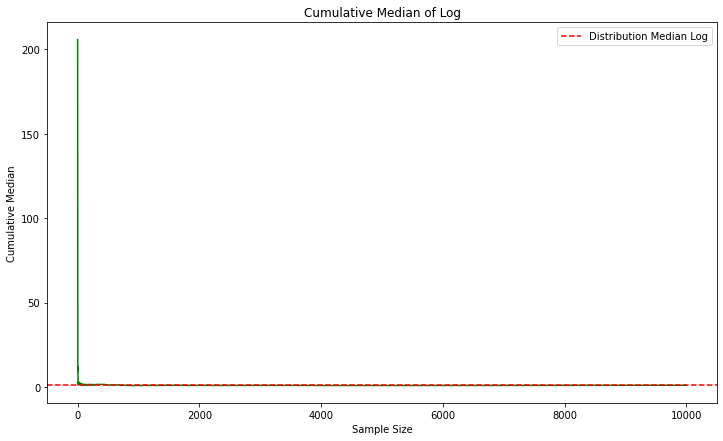

In [122]:
#Point 7 till 8
cumulative_median_log = np.zeros(len(X_log))
for i in range(len(X_log)):
    cumulative_median_log[i] = np.median(X_log[:i+1])

plt.plot(np.arange(1, len(X_log) + 1), cumulative_median_log, '-',color="green")
plt.axhline(y=distribution_median_log, color='r', linestyle='--', label='Distribution Median Log')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Median')
plt.title('Cumulative Median of Log')
plt.legend()
plt.show() # The median is very low compared to mean, since ~99% we sample low numbers 
           #  and while the mean might be pushed up by a single lucky number, when we are calculating median, we only look at quantiles.

# Paper Dataset

In [119]:
paper_cite = pd.read_csv('path...')

x_data = np.random.choice(paper_cite, size = 10000)

inf